In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset shape: (247950, 42)
Columns: ['Type', 'url_length', 'number_of_dots_in_url', 'having_repeated_digits_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_hyphens_in_url', 'number_of_underline_in_url', 'number_of_slash_in_url', 'number_of_questionmark_in_url', 'number_of_equal_in_url', 'number_of_at_in_url', 'number_of_dollar_in_url', 'number_of_exclamation_in_url', 'number_of_hashtag_in_url', 'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain', 'number_of_hyphens_in_domain', 'having_special_characters_in_domain', 'number_of_special_characters_in_domain', 'having_digits_in_domain', 'number_of_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'having_dot_in_subdomain', 'having_hyphen_in_subdomain', 'average_subdomain_length', 'average_number_of_dots_in_subdomain', 'average_number_of_hyphens_in_subdomain', 'having_special_characters_in_subdomain', 'number_of_special_characters_in_subdomain', 'having_digits

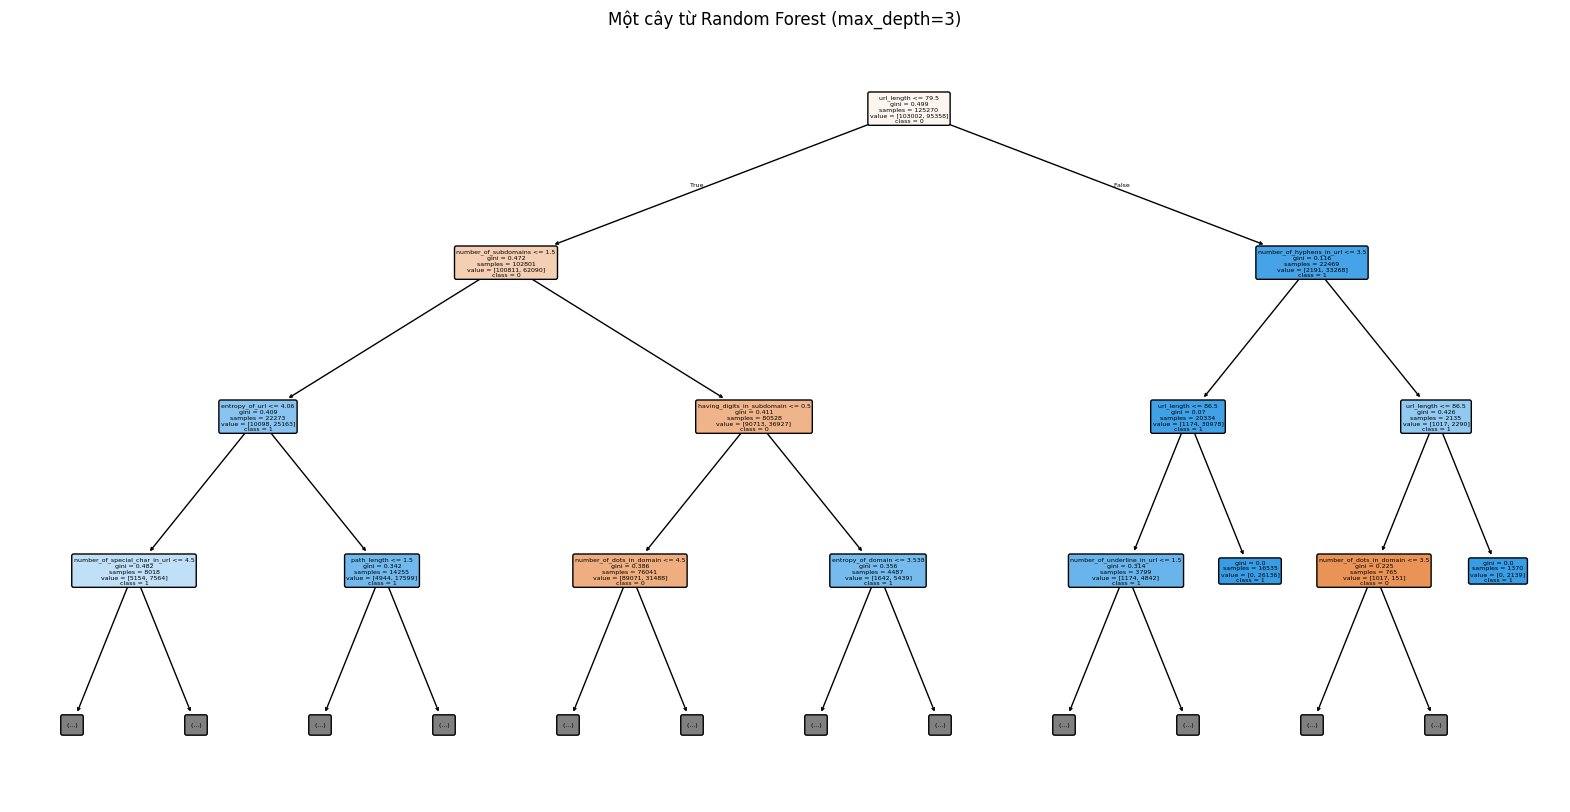

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset.csv')
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
print("First 5 rows:")
print(data.head())

# Giả sử cột đầu tiên là nhãn (target) và các cột còn lại là đặc trưng
target_col = data.columns[0]
X = data.iloc[:, 1:]
y = data[target_col]

# Nếu y là dữ liệu liên tục nhưng bạn muốn phân loại, bạn có thể chuyển đổi nó.
# Ví dụ: chuyển thành 2 lớp dựa trên median
if np.issubdtype(y.dtype, np.number) and y.nunique() > 10:
    threshold = y.median()
    y = np.where(y < threshold, 0, 1)
    print("Chuyển đổi target thành nhãn phân loại với median =", threshold)
    print("Unique classes:", np.unique(y, return_counts=True))

# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Khởi tạo và huấn luyện Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Dự đoán và đánh giá mô hình
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Kiểm tra tầm quan trọng của các đặc trưng
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature ranking:")
for i, idx in enumerate(indices):
    print("%d. %s (importance: %.4f)" % (i + 1, X.columns[idx], importances[idx]))

# 6. (Tùy chọn) Vẽ trực quan hóa một trong các cây trong rừng
# Vì vẽ toàn bộ random forest là không khả thi, ta chỉ vẽ một cây với độ sâu giới hạn.
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names=[str(c) for c in np.unique(y)],
               rounded=True,
               max_depth=3)
plt.title("Một cây từ Random Forest (max_depth=3)")
plt.show()
